# Juntando R y Python

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

In [5]:
rpy2.robjects.numpy2ri.activate()

In [6]:
codigo_r = """
saludar <- function(cadena){
    return(paste("Hola, ", cadena))
}

"""

In [7]:
ro.r(codigo_r)

R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x000001A5D87D9E08 / R:0x000001A5EC746818>

In [8]:
saludar_py = ro.globalenv["saludar"]

In [9]:
res = saludar_py("Camilo")
res[0]

'Hola,  Camilo'

In [10]:
var_from_python = ro.FloatVector(np.arange(1,5, 0.1))

In [11]:
var_from_python

1.000000,1.100000,1.200000,1.300000,...,4.600000,4.700000,4.800000,4.900000


### Para ver la representación en R

In [12]:
print(var_from_python.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


#### En el ambiente "R" añade la variable "var_to_r" desde la variable de Python

In [13]:
ro.globalenv["var_to_r"] = var_from_python

#### Esto ya es en lenguaje R

In [14]:
ro.r("var_to_r")

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [15]:
ro.r("sum(var_to_r)")

array([118.])

In [16]:
ro.r("mean(var_to_r)")

array([2.95])

In [17]:
ro.r("sd(var_to_r)")

array([1.16904519])

In [18]:
np.sum(var_from_python)

118.00000000000007

In [19]:
np.mean(var_from_python)

2.950000000000002

### Una herramienta muy útil de R es summary(data), la cual entrega:
* El valor mínimo
* El primer cuartil
* La mediana
* La media
* El valor máximo

In [20]:
ro.r("summary(var_to_r)")

array([1.   , 1.975, 2.95 , 2.95 , 3.925, 4.9  ])

In [21]:
#ro.r("hist(var_to_r, breaks = 4)")

# Trabajar de forma conjunta entre R y Python

In [22]:
from rpy2.robjects.packages import importr

In [23]:
extremes = importr("extRemes")  #libreria extremes

In [66]:
fevd = extremes.fevd

In [25]:
print(fevd.__doc__)

Python representation of an R function.
description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector - Python:0x000001A5ED6695D0 / R:0x000001A5E97D6478>,
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

x :  `fevd`: `x` can be a numeric vector, the name of a column of `data` or a formula giving the data t

In [26]:
data = pd.read_csv("../datasets/time/time_series.txt", 
                  sep ="\s+", skiprows = 1, parse_dates = [[0,1]],
                  names = ["data", "time", "windspeed"],
                  index_col=0)

In [27]:
data.head()

,windspeed
data_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [28]:
len(data)

275352

### Queremos encontrar la velocidad del viento máxima por año:

In [67]:
max_ws = data.windspeed.groupby(pd.Grouper(freq = "A")).max()  ## Se puede hacer con min, mean, lo que quiera

In [68]:
max_ws.head()

data_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
Freq: A-DEC, Name: windspeed, dtype: float64

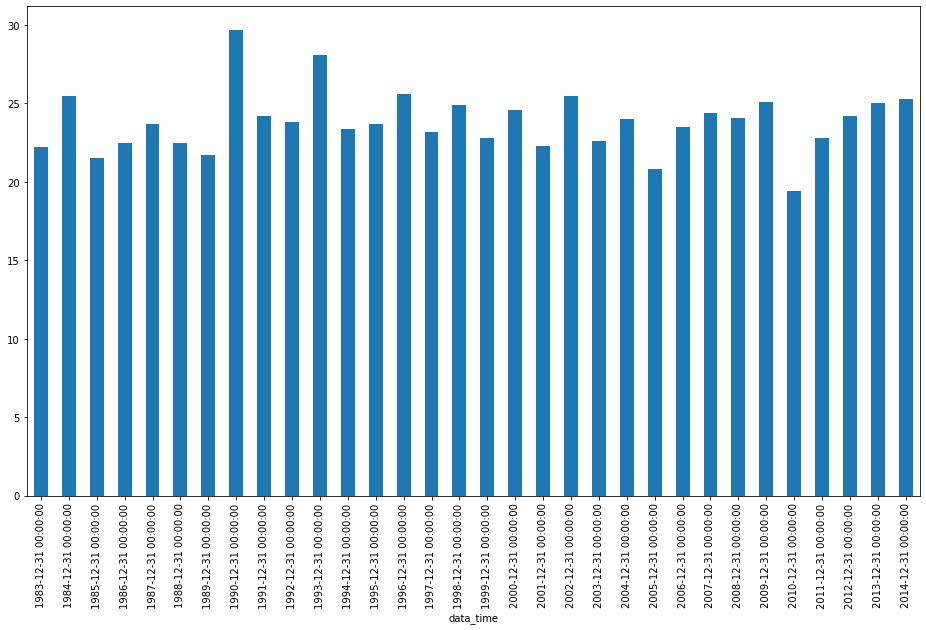

In [31]:
max_ws.plot(kind="bar", figsize=(16,9))

In [75]:
result = fevd(max_ws.values, type ="GEV", method ="GMLE")

In [33]:
type(result)

rpy2.robjects.vectors.ListVector

In [34]:
result.r_repr

<bound method RObjectMixin.r_repr of R object with classes: ('fevd',) mapped to:
<ListVector - Python:0x000001A5EDA30508 / R:0x000001A5EA3AF638>
[Vector, StrVector, FloatVector, Array, ..., StrVector, StrVector, ListVector, ListVector]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('fevd',) mapped to:
<Vector - Python:0x000001A5EDA34C88 / R:0x000001A5ECD8AE08>
[SignatureT..., Array, StrVector, StrVector]
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x000001A5EDA26188 / R:0x000001A5EA2A44D8>
['struct..., '23.8, ..., '22.6, ..., '25.3),..., '']
  weights: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000001A5EDC96A48 / R:0x000001A5E9F21FA8>
[1.000000]
  missing.values: <class 'rpy2.robjects.vectors.Array'>
  R object with classes: ('array',) mapped to:
<Array - Python:0x000001A5E9B79808 / R:0x000001A5ED51B708>
[ 

In [35]:
print(result.names)

 [1] "call"            "data.name"       "weights"         "missing.values" 

 [5] "in.data"         "x"               "priorFun"        "priorParams"    

 [9] "method"          "type"            "period.basis"    "par.models"     

[13] "const.loc"       "const.scale"     "const.shape"     "n"              

[17] "na.action"       "parnames"        "results"         "initial.results"



In [36]:
res = result.rx("results")

In [37]:
print(res)

$results

$results$par

  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



$results$value

[1] 1e+16



$results$counts

function gradient 

       1        1 



$results$convergence

[1] 0



$results$message

NULL



$results$hessian

         location scale shape

location        0     0     0

scale           0     0     0

shape           0     0     0



$results$num.pars

$results$num.pars$location

[1] 1



$results$num.pars$scale

[1] 1



$results$num.pars$shape

[1] 1









In [38]:
loc, scale, shape = res[0].rx("par")[0]

In [39]:
loc, scale, shape

(23.063941519915588, 1.7576912874286317, -0.1628816367714792)

# Función Mágica para R

In [40]:
%load_ext rpy2.ipython

In [41]:
help(rpy2.ipython.rmagic.RMagics.R)

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE]
             [-b BG] [--noisolation] [-u {px,in,cm,mm}] [-r RES] [-c CONVERTER]
             [code [code ...]]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R REPL.
    
    Nothing is returned to python by default in cell mode::

In [42]:
%R X=c(1,4,5,7); sd(X); mean(X)

array([4.25])

In [43]:
%%R
Y = c(2,4,3,9)
lm = lm(Y~X)
summary(lm)

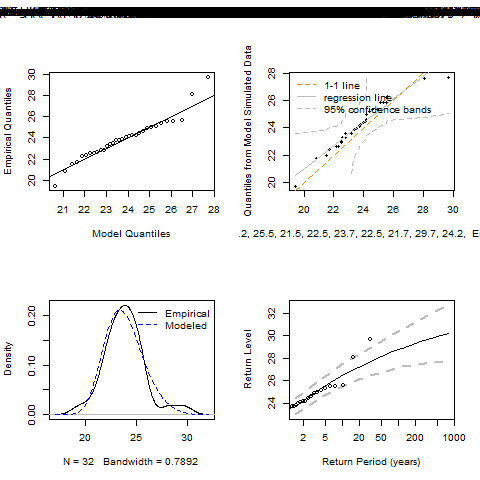

In [76]:
%R -i result plot.fevd(result)

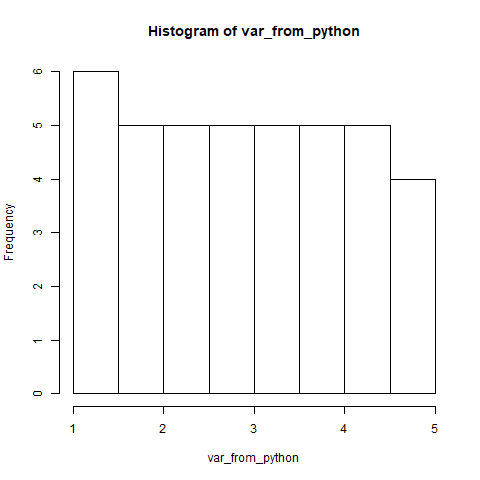

R object with classes: ('histogram',) mapped to:
<ListVector - Python:0x000001A5EDCCDE08 / R:0x000001A5F0791F10>
[Float..., IntVe..., Float..., Float..., StrVe..., BoolV...]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000001A5EDCCF248 / R:0x000001A5F0747038>
[1.000000, 1.500000, 2.000000, 2.500000, ..., 3.500000, 4.000000, 4.500000, 5.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x000001A5EDA22488 / R:0x000001A5F07B2598>
[6, 5, 5, 5, 5, 5, 5, 4]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000001A5ED715388 / R:0x000001A5F07923E0>
[0.300000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.200000]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000001A5ED7150C8 / R:0x000001A5F0792140>
[1.250000, 1.750000, 2.250000, 2.750000, 3.250000, 3.750000, 4.250000, 4.750000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x000001A5ED715248 / R:0x000001A5F0790290>
['var_from_python']
  equidist: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x000001A5ED715E08 / R:0x000001A5E9753E10>
[       1]

In [45]:
%R -i var_from_python hist(var_from_python)

# Un ejemplo complejo de R, Python y RMagic

In [46]:
metodos = ["MLE", "GMLE"]
tipo = ["GEV", "Gumbel"]

In [69]:
max_ws.values

array([22.2, 25.5, 21.5, 22.5, 23.7, 22.5, 21.7, 29.7, 24.2, 23.8, 28.1,
       23.4, 23.7, 25.6, 23.2, 24.9, 22.8, 24.6, 22.3, 25.5, 22.6, 24. ,
       20.8, 23.5, 24.4, 24.1, 25.1, 19.4, 22.8, 24.2, 25. , 25.3])

Tipo de Ajuste: GEV
Método del ajuste: MLE
$par

  location      scale      shape 

23.0517078  1.8085853 -0.1497984 



$value

[1] 66.22729



$counts

function gradient 

      28        6 



$convergence

[1] 0



$message

NULL



$hessian

           location      scale     shape

location  9.1825628 -0.3982934  11.22038

scale    -0.3982934 21.4422632  19.81854

shape    11.2203805 19.8185358 172.17411



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







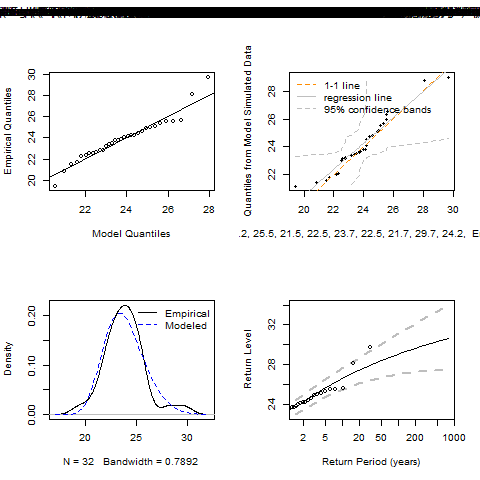

Tipo de Ajuste: GEV
Método del ajuste: GMLE
$par

  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



$value

[1] 1e+16



$counts

function gradient 

       1        1 



$convergence

[1] 0



$message

NULL



$hessian

         location scale shape

location        0     0     0

scale           0     0     0

shape           0     0     0



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







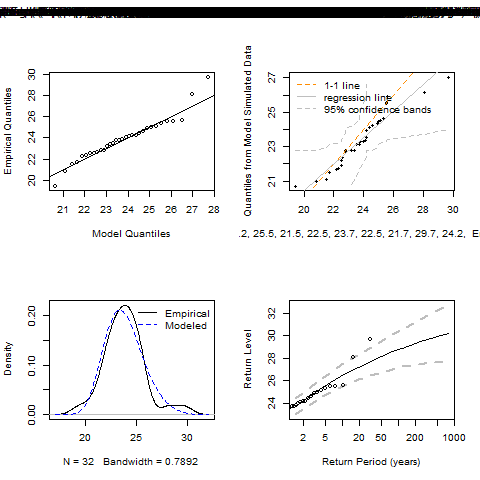

Tipo de Ajuste: Gumbel
Método del ajuste: MLE
$par

 location     scale 

22.905876  1.814452 



$value

[1] 67.38487



$counts

function gradient 

      14        5 



$convergence

[1] 0



$message

NULL



$hessian

          location     scale

location  9.719762 -4.762621

scale    -4.762621 21.535378



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

NULL







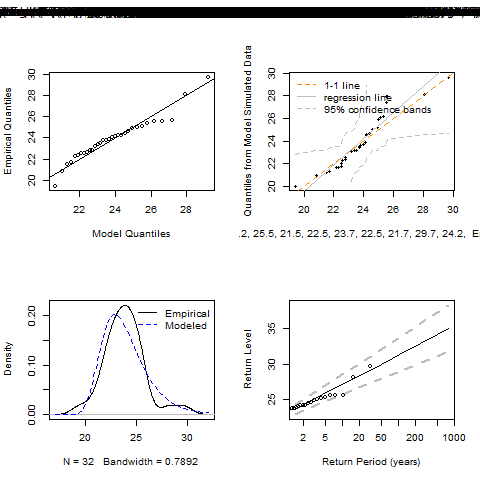

Tipo de Ajuste: Gumbel
Método del ajuste: GMLE
$par

 location     scale 

22.905876  1.814452 



$value

[1] 67.38487



$counts

function gradient 

      14        5 



$convergence

[1] 0



$message

NULL



$hessian

          location     scale

location  9.719762 -4.762621

scale    -4.762621 21.535378



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

NULL







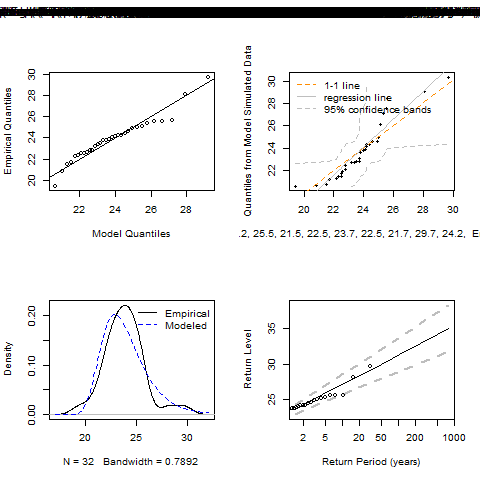

In [96]:
for t in tipo:
    for m in metodos:
        print("Tipo de Ajuste:", t)
        print("Método del ajuste:", m)
        result = fevd(max_ws.values, method = m, type = t)
        print(result.rx("results")[0])
        %R -i result plot.fevd(result)